<a href="https://colab.research.google.com/github/pgeorgant/pgeorgant.github.io/blob/main/kalman_1d_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

Sigma_w = torch.tensor([[1, 0.2],[0.2, 1]])
Sigma_v = torch.tensor(0.9)

A = torch.tensor([[1.0, 1],[0, 1]])*0.5
C = torch.ones(2,1)*0.5

N = 100

In [ ]:
# Ground truth
s = torch.randn(2,1)
y_true = []
for _ in range(0,N):
    s = A@s + Sigma_w@torch.randn(2,1)
    y_true.append(C.t()@s + torch.randn(1,1)*.1)
y_true = torch.cat(y_true)

In [ ]:

s_post = torch.ones(2,1)
Sigma_post = torch.eye(2)

s_prior_hist = []
y_pred = []
K_hist = []
for ii in range(0,N):
    Sigma_prior = A@Sigma_post@A.t() + Sigma_w
    K = Sigma_prior@C/(C.t()@Sigma_prior@C + Sigma_v)
    K_hist.append(K)
    Sigma_post = Sigma_prior + (C.t()@Sigma_prior@C + Sigma_v)*K@K.t() - 2*Sigma_prior@C@K.t()
    s_prior = A@s_post
    s_prior_hist.append(s_prior)
    y_prior = C.t()@s_prior
    y_pred.append(y_prior)
    i = y_true[ii] - y_prior
    s_post = s_prior + K@i

y_pred = torch.cat(y_pred)
s_prior_hist = torch.cat(s_prior_hist,1)
K_hist = torch.cat(K_hist,1)

Text(0.5, 1.0, 'K')

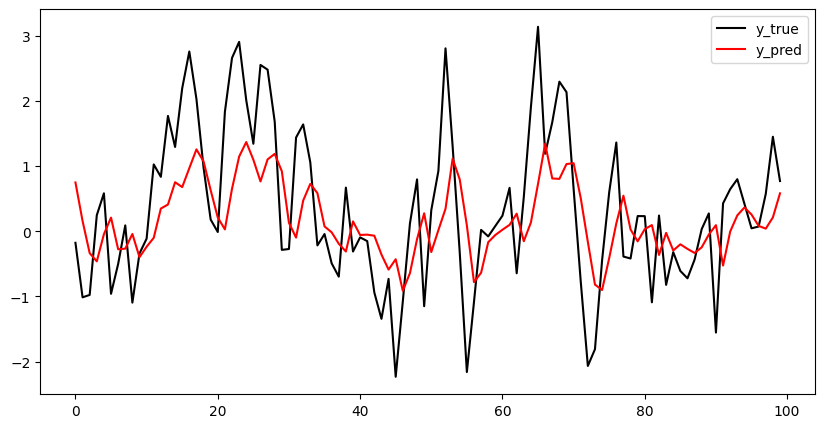

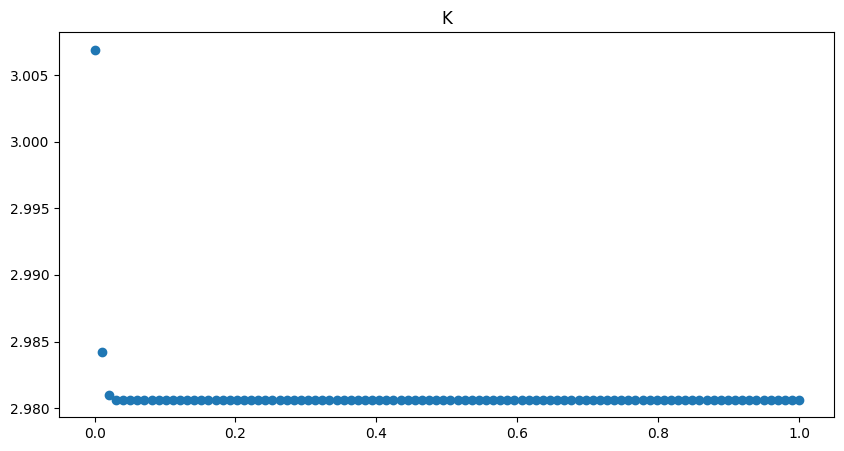

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_true,color='k',label='y_true')
plt.plot(y_pred,color='r',label='y_pred')
plt.legend()

plt.figure(figsize=(10,5))
plt.scatter(torch.linspace(0,1,100),sum(K_hist,2))
plt.title('K')